# **Análisis Exploratorio de Datos de GapMinder**

## **Objetivo del Análisis**  
El propósito de este estudio es explorar y transformar los datos de GapMinder, enfocándonos en la disparidad de escalas entre diferentes variables socioeconómicas, como la esperanza de vida (*life expectancy*) y el PIB per cápita (*GDP per capita*). Aplicaremos técnicas de escalado adecuadas para mejorar la comparabilidad de los datos y visualizaremos su impacto en las distribuciones y relaciones entre variables.

## **Pasos del Análisis**  

### 1. **Carga y Exploración de los Datos**  
- Importar el dataset de GapMinder y examinar su estructura.  
- Identificar las variables clave para el análisis.  
- Evaluar la distribución y dispersión de los datos mediante estadísticas descriptivas y visualizaciones.  

### 2. **Detección de Disparidades en las Escalas**  
- Comparar la magnitud de las variables como `life_exp` y `GDP_per_cap`.  
- Utilizar histogramas y diagramas de caja (*boxplots*) para identificar valores atípicos y diferencias de escala.  

### 3. **Aplicación de Técnicas de Escalado**  
- Utilizar métodos de normalización o estandarización (`MinMaxScaler`, `StandardScaler`, `RobustScaler`) según la distribución de los datos.  
- Comparar los efectos del escalado sobre la distribución de los datos.  

### 4. **Visualización de las Dimensiones Principales**  
- Aplicar Análisis de Componentes Principales (PCA) para reducir la dimensionalidad y visualizar patrones en los datos.  
- Generar gráficos de dispersión para comparar las dimensiones principales antes y después del escalado.  

### 5. **Pairplots y Comparación de Transformaciones**  
- Generar *pairplots* con `seaborn` para observar relaciones entre variables antes y después de la transformación.  
- Evaluar cómo cambia la estructura de los datos tras la normalización o estandarización.  

## **Resultados Esperados**  
- Identificar la magnitud de la disparidad entre variables clave.  
- Evaluar qué método de escalado es más adecuado para estos datos.  
- Observar cómo cambian las relaciones entre variables tras la transformación.  
- Generar visualizaciones que permitan interpretar mejor las relaciones entre indicadores socioeconómicos.  


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns


### 1️⃣ **Carga y Exploración Inicial de Datos [Soften Data]** 

📌 Código para cargar los datos: aquí



In [2]:
import io
import os
print(os.listdir("../data/raw/"))  # Muestra todos los archivos en la carpeta
file_path = r"../data/raw/GapMinderBO N.csv"
# Intentar cargar el archivo
try:
    dfraw = pd.read_csv(file_path, sep=';', encoding='utf-8')
    print("✅ Datos cargados correctamente")
except FileNotFoundError:
    print("❌ Error: Archivo no encontrado. Verifica la ruta.")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

# Mostrar las primeras filas del dataset
dfraw.head()



['GapMinderBO N.csv']
✅ Datos cargados correctamente


,country,continent,year,life_exp,pop,gdp_per_cap,Unnamed: 6
0,Afghanistan,Asia,1952.0,29.0,8425333.0,779.0,4453.0
1,Afghanistan,Asia,1957.0,30.0,9240934.0,820.0,8530.0
2,Afghanistan,Asia,1962.0,32.0,10267083.0,853.0,1007.0
3,Afghanistan,Asia,1967.0,34.0,11537966.0,836.0,1971.0
4,Afghanistan,Asia,1972.0,36.0,13079460.0,739.0,9811.0


In [3]:
dfraw

,country,continent,year,life_exp,pop,gdp_per_cap,Unnamed: 6
0,Afghanistan,Asia,1952.0,29.0,8425333.0,779.0,4453.0
1,Afghanistan,Asia,1957.0,30.0,9240934.0,820.0,8530.0
2,Afghanistan,Asia,1962.0,32.0,10267083.0,853.0,1007.0
3,Afghanistan,Asia,1967.0,34.0,11537966.0,836.0,1971.0
4,Afghanistan,Asia,1972.0,36.0,13079460.0,739.0,9811.0
...,...,...,...,...,...,...,...
1627,Zimbabwe,Africa,1987.0,62.0,9216418.0,706.0,1573.0
1628,Zimbabwe,Africa,1992.0,60.0,10704340.0,693.0,4208.0
1629,Zimbabwe,Africa,1997.0,47.0,11404948.0,792.0,4500.0
1630,Zimbabwe,Africa,2002.0,40.0,11926563.0,672.0,386.0


🔹 Paso 2: Explorar el dataset
Antes de procesar los datos, veamos un resumen de su contenido:

📌 Código para explorar los datos:

In [4]:

# Verificar la estructura del dataset
dfraw.info()

# Ver los valores faltantes
missing_values = dfraw.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Estadísticas descriptivas
dfraw.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1632 non-null   object 
 1   continent    1630 non-null   object 
 2   year         1623 non-null   float64
 3   life_exp     1604 non-null   float64
 4   pop          1602 non-null   float64
 5   gdp_per_cap  1621 non-null   float64
 6   Unnamed: 6   1622 non-null   float64
dtypes: float64(5), object(2)
memory usage: 89.4+ KB
Valores nulos por columna:
 country         0
continent       2
year            9
life_exp       28
pop            30
gdp_per_cap    11
Unnamed: 6     10
dtype: int64


,year,life_exp,pop,gdp_per_cap,Unnamed: 6
count,1623.000000,1604.000000,1.602000e+03,1621.000000,1622.000000
mean,1979.569316,59.618454,3.057633e+07,7305.639112,4895.716400
std,17.262318,12.941118,1.093528e+08,9948.995975,2931.649709
min,1952.000000,24.000000,6.001100e+04,298.000000,0.000000
25%,1967.000000,48.000000,2.783061e+06,1202.000000,2342.750000
50%,1982.000000,61.000000,7.018706e+06,3630.000000,4855.500000
75%,1997.000000,71.000000,1.912220e+07,9498.000000,7410.750000
max,2007.000000,83.000000,1.318683e+09,113523.000000,9992.000000


In [5]:
dfraw.shape

(1632, 7)

In [6]:
dfraw.dtypes

country         object
continent       object
year           float64
life_exp       float64
pop            float64
gdp_per_cap    float64
Unnamed: 6     float64
dtype: object

In [7]:
dfraw.count()

country        1632
continent      1630
year           1623
life_exp       1604
pop            1602
gdp_per_cap    1621
Unnamed: 6     1622
dtype: int64

🔹 Paso 3: Identificar disparidad de escalas
Como buscamos diferencias de escalas entre variables como life_exp y GDP_per_cap, visualizamos las estadísticas básicas y los rangos de valores.

📌 Código para comparar escalas:

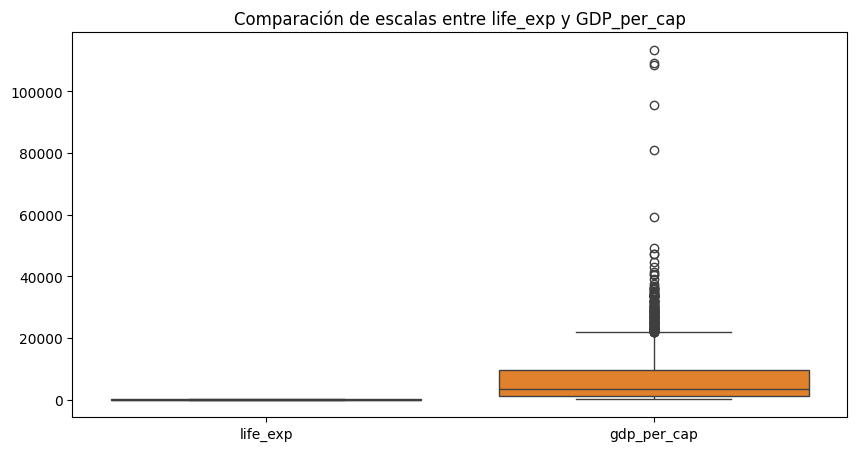

In [8]:
# Seleccionar columnas clave para analizar
cols_to_compare = ["life_exp", "gdp_per_cap"]

# Boxplot para ver la distribución
plt.figure(figsize=(10,5))
sns.boxplot(data=dfraw[cols_to_compare])
plt.title("Comparación de escalas entre life_exp y GDP_per_cap")
plt.show()

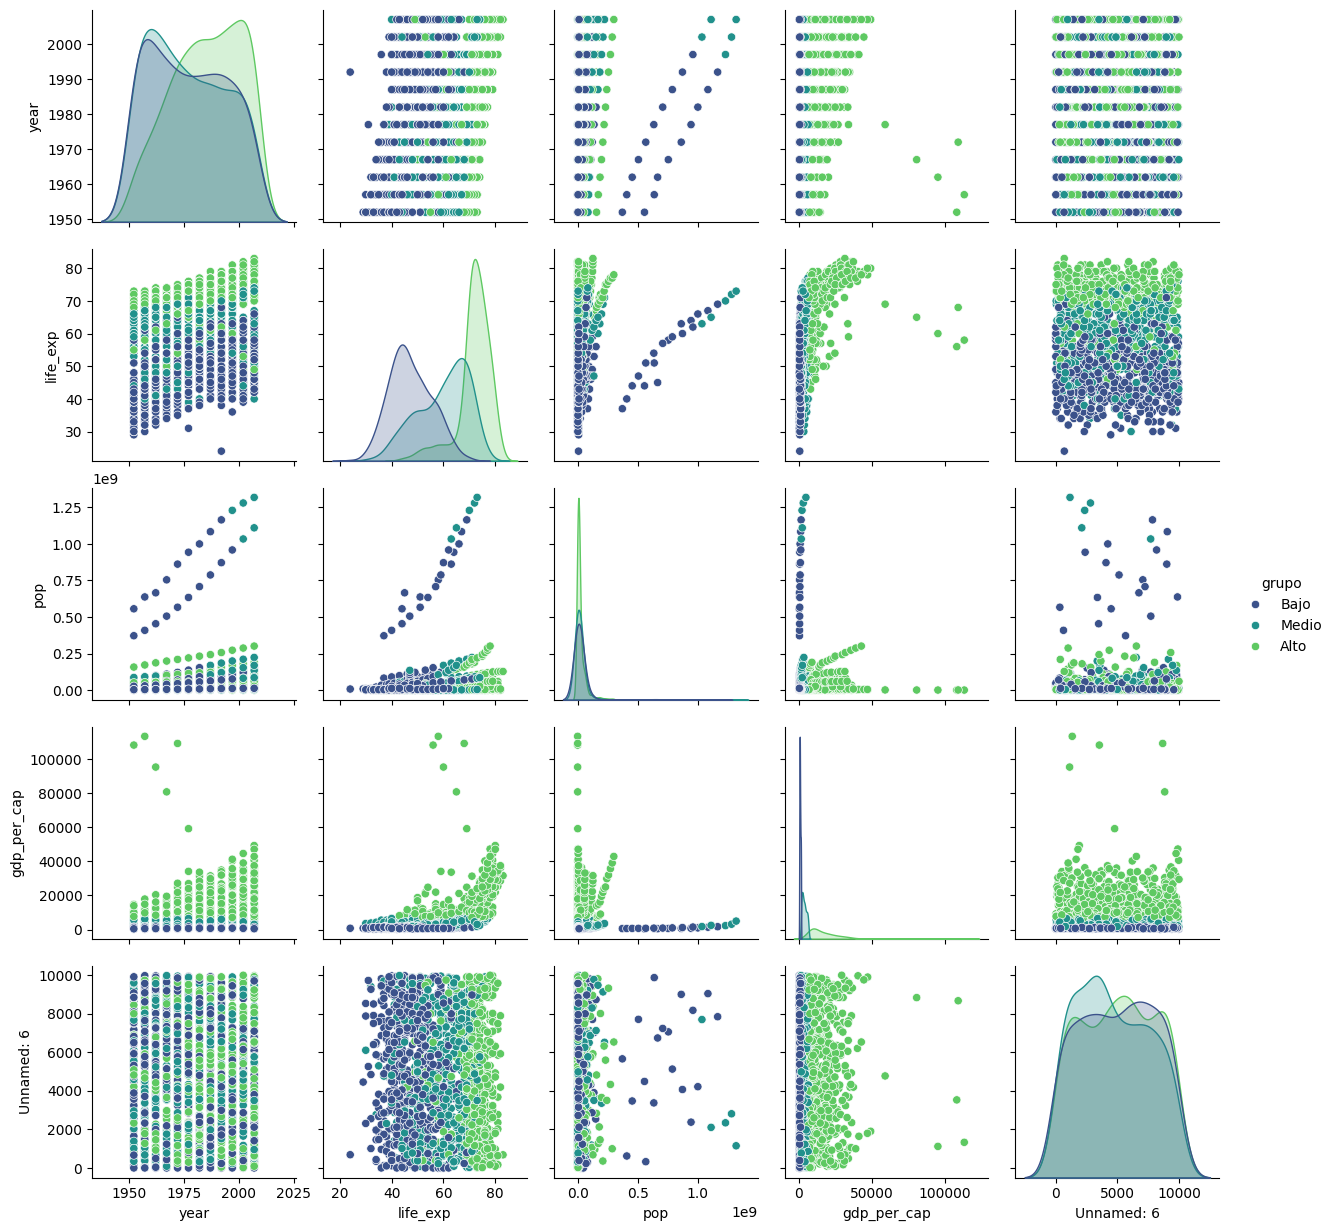

In [9]:
dfraw["grupo"] = pd.qcut(dfraw["gdp_per_cap"], q=3, labels=["Bajo", "Medio", "Alto"])
sns.pairplot(dfraw, hue="grupo", palette="viridis")
plt.show()


In [10]:
# Detectar valores nulos en el DataFrame
missing_values = dfraw.isnull().sum()  

# Mostrar cuántos valores nulos hay por columna
print("Valores nulos por columna:\n", missing_values)

# Ver las columnas con valores nulos
print("Columnas con valores nulos:", missing_values[missing_values > 0].index.tolist())


Valores nulos por columna:
 country         0
continent       2
year            9
life_exp       28
pop            30
gdp_per_cap    11
Unnamed: 6     10
grupo          11
dtype: int64
Columnas con valores nulos: ['continent', 'year', 'life_exp', 'pop', 'gdp_per_cap', 'Unnamed: 6', 'grupo']


In [11]:
# Contar el total de valores nulos en todo el DataFrame
total_missing = dfraw.isnull().sum().sum()  # O df1.isna().sum().sum()
print(f"Total de valores nulos: {total_missing}")


Total de valores nulos: 101


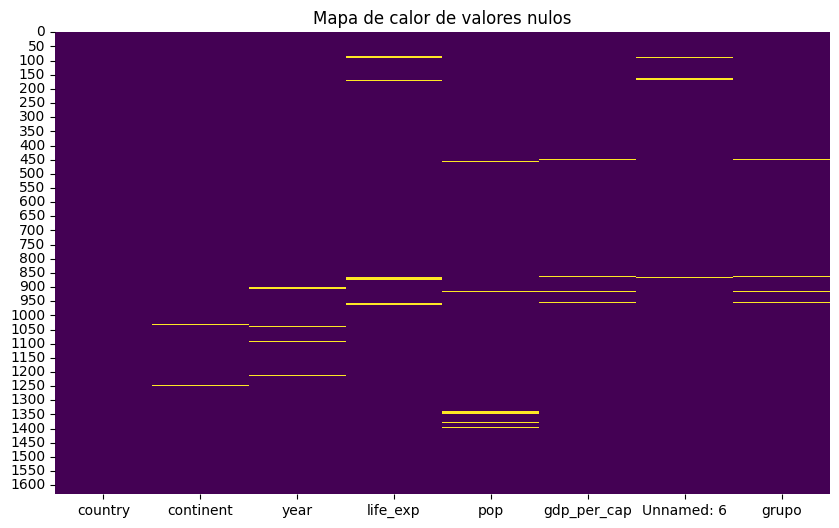

In [12]:
# Visualizar la distribución de los valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(dfraw.isnull(), cbar=False, cmap="viridis")  # Muestra un mapa de calor
plt.title("Mapa de calor de valores nulos")
plt.show()


📌 ¿Qué hacer cuando encontramos valores nulos?
Una vez identificados los valores nulos, tenemos varias opciones para tratarlos:
La primera opcion seria interpretar los datos, tratarlos e interpolarizarlos.

In [13]:
df1_cleaned = dfraw.dropna()  # Elimina filas con al menos un valor nulo
print(df1_cleaned.isnull().sum())  # Comprobar que los NaN han sido eliminados

country        0
continent      0
year           0
life_exp       0
pop            0
gdp_per_cap    0
Unnamed: 6     0
grupo          0
dtype: int64


In [14]:
#Guardamos el archivo:
# Especificar la ruta de la carpeta donde quieres guardar el archivo
print(os.listdir("../data/processed/"))  # Muestra todos los archivos en la carpeta
folder_path = r"../data/processed/"

# Si la carpeta no existe, crearla
os.makedirs(folder_path, exist_ok=True)
# 
# Especificar el nombre del archivo
file_path = os.path.join(folder_path, 'gapminder_actualizado_cleaned.csv')

# Guardar el DataFrame en un archivo CSV con ';' como separador y codificación 'utf-8'
df1_cleaned.to_csv(file_path, sep=';', encoding='utf-8', index=False)

print(f"Archivo guardado en: {file_path}")

['.ipynb_checkpoints', 'gapminder_actualizado.csv', 'gapminder_actualizado_cleaned.csv', 'gapminder_actualizado_completo_interpolado.csv']
Archivo guardado en: ../data/processed/gapminder_actualizado_cleaned.csv


In [15]:
# Filtrar las filas donde 'continent' tiene valores nulos
missing_continent = dfraw[dfraw['continent'].isnull()]

# Mostrar las filas con valores nulos en 'continent'
missing_continent

,country,continent,year,life_exp,pop,gdp_per_cap,Unnamed: 6,grupo
1032,New Zealand,NaN,1952.0,69.0,1994794.0,10556.0,5757.0,Alto
1248,Saudi Arabia,NaN,1952.0,40.0,4005677.0,6459.0,5548.0,Medio


In [16]:
# Filtrar las filas donde 'continent' tiene valores nulos
missing_unnamed	 = dfraw[dfraw['Unnamed: 6'].isnull()]

# Mostrar las filas con valores nulos en 'continent'
missing_unnamed

,country,continent,year,life_exp,pop,gdp_per_cap,Unnamed: 6,grupo
89,Bahrain,Asia,1977.0,NaN,297410.0,19340.0,NaN,Alto
98,Bangladesh,Asia,1962.0,41.0,56839289.0,686.0,NaN,Bajo
99,Bangladesh,Asia,1967.0,43.0,62821884.0,721.0,NaN,Bajo
104,Bangladesh,Asia,1992.0,56.0,113704579.0,837.0,NaN,Bajo
163,Botswana,Africa,1987.0,64.0,1151184.0,6205.0,NaN,Medio
164,Botswana,Africa,1992.0,63.0,1342614.0,7954.0,NaN,Alto
165,Botswana,Africa,1997.0,53.0,1536536.0,8647.0,NaN,Alto
166,Botswana,Africa,2002.0,47.0,1630347.0,11003.0,NaN,Alto
167,Botswana,Africa,2007.0,51.0,1639131.0,12569.0,NaN,Alto
866,Malawi,Africa,1962.0,NaN,3628608.0,427.0,NaN,Bajo


In [17]:
# Ver los valores únicos en la columna 'continent'
unique_continents = dfraw['continent'].unique()
print("Valores únicos en 'continent':", unique_continents)

# Ver el conteo de cada tipo de continente
continent_counts = dfraw['continent'].value_counts()
print("Conteo de cada continente:")
print(continent_counts)


Valores únicos en 'continent': ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania' nan]
Conteo de cada continente:
continent
Africa      600
Europe      360
Asia        347
Americas    300
Oceania      23
Name: count, dtype: int64


In [18]:
# Asignar 'Oceania' a 'New Zealand' y 'Asia' a 'Saudi Arabia' en la columna 'continent'
df1 = dfraw
df1.loc[dfraw['country'] == 'New Zealand', 'continent'] = 'Oceania'
df1.loc[dfraw['country'] == 'Saudi Arabia', 'continent'] = 'Asia'


In [19]:
# Verificar los cambios
print(df1[df1['country'].isin(['New Zealand', 'Saudi Arabia'])])


           country continent    year  life_exp         pop  gdp_per_cap  \
1032   New Zealand   Oceania  1952.0      69.0   1994794.0      10556.0   
1033   New Zealand   Oceania  1957.0      70.0   2229407.0      12247.0   
1034   New Zealand   Oceania  1962.0      71.0   2488550.0      13175.0   
1035   New Zealand   Oceania  1967.0       NaN   2728150.0      14463.0   
1036   New Zealand   Oceania  1972.0      72.0   2929100.0      16046.0   
1037   New Zealand   Oceania  1977.0      72.0   3164900.0      16233.0   
1038   New Zealand   Oceania  1982.0      74.0   3210650.0      17632.0   
1039   New Zealand   Oceania     NaN      74.0   3317166.0      19007.0   
1040   New Zealand   Oceania  1992.0      76.0   3437674.0      18363.0   
1041   New Zealand   Oceania  1997.0      78.0   3676187.0      21050.0   
1042   New Zealand   Oceania  2002.0      79.0   3908037.0      23189.0   
1043   New Zealand   Oceania  2007.0      80.0   4115771.0      25185.0   
1248  Saudi Arabia      A

In [20]:
# Filtrar las filas donde 'continent' tiene valores nulos
missing_continent = df1[df1['continent'].isnull()]

# Mostrar las filas con valores nulos en 'continent'
missing_continent

,country,continent,year,life_exp,pop,gdp_per_cap,Unnamed: 6,grupo


In [21]:
# Ver los valores únicos en la columna 'continent'
unique_continents = df1['continent'].unique()
print("Valores únicos en 'continent':", unique_continents)

# Ver el conteo de cada tipo de continente
continent_counts = df1['continent'].value_counts()
print("Conteo de cada continente:")
print(continent_counts)

Valores únicos en 'continent': ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
Conteo de cada continente:
continent
Africa      600
Europe      360
Asia        348
Americas    300
Oceania      24
Name: count, dtype: int64


In [22]:
# Detectar valores nulos en el DataFrame
missing_values = df1.isnull().sum()  

# Mostrar cuántos valores nulos hay por columna
print("Valores nulos por columna:\n", missing_values)

# Ver las columnas con valores nulos
print("Columnas con valores nulos:", missing_values[missing_values > 0].index.tolist())


Valores nulos por columna:
 country         0
continent       0
year            9
life_exp       28
pop            30
gdp_per_cap    11
Unnamed: 6     10
grupo          11
dtype: int64
Columnas con valores nulos: ['year', 'life_exp', 'pop', 'gdp_per_cap', 'Unnamed: 6', 'grupo']


In [23]:
df1.dtypes

country          object
continent        object
year            float64
life_exp        float64
pop             float64
gdp_per_cap     float64
Unnamed: 6      float64
grupo          category
dtype: object

In [24]:
# Ver los valores únicos en la columna 'continent'
unique_grupo = df1['grupo'].unique()
print("Valores únicos en 'grupo':", unique_grupo)

# Ver el conteo de cada tipo de continente
grupo_counts = df1['grupo'].value_counts()
print("Conteo de cada grupo:")
print(grupo_counts)

Valores únicos en 'grupo': ['Bajo', 'Medio', 'Alto', NaN]
Categories (3, object): ['Bajo' < 'Medio' < 'Alto']
Conteo de cada grupo:
grupo
Bajo     541
Alto     541
Medio    539
Name: count, dtype: int64


In [25]:
# Filtrar las filas donde 'continent' tiene valores nulos
missing_grupo = df1[df1['grupo'].isnull()]

# Mostrar las filas con valores nulos en 'continent'
missing_grupo

,country,continent,year,life_exp,pop,gdp_per_cap,Unnamed: 6,grupo
449,El Salvador,Americas,1977.0,57.0,4282586.0,NaN,9224.0,NaN
861,Madagascar,Africa,1997.0,55.0,14165114.0,NaN,2959.0,NaN
862,Madagascar,Africa,2002.0,57.0,16473477.0,NaN,6371.0,NaN
863,Madagascar,Africa,2007.0,59.0,19167654.0,NaN,7701.0,NaN
916,Mauritius,Africa,1972.0,63.0,NaN,NaN,4842.0,NaN
955,Montenegro,Europe,1987.0,75.0,569473.0,NaN,5102.0,NaN
1208,Reunion,Africa,1992.0,74.0,622191.0,NaN,2558.0,NaN
1214,Romania,Europe,1962.0,67.0,18680721.0,NaN,9976.0,NaN
1373,Sri Lanka,Asia,1977.0,66.0,14116836.0,NaN,7757.0,NaN
1419,Switzerland,Europe,1967.0,73.0,6063000.0,NaN,1443.0,NaN


In [26]:
#podemos observar que no estan asignados a ningun grupo porque no sabemos su gdp sabiendo que nos falta por interpolar 
#year            9
#life_exp       28
#pop            30
#gdp_per_cap    11
#Unnamed: 6     10
# Interpolar solo los valores nulos en 'year'
df1.loc[df1['year'].isna(), 'year'] = df1['year'].interpolate(method='linear')

# Convertir 'year' a entero (porque debe ser un año completo)
df1['year'] = df1['year'].round().astype(int)

# Verificar si quedan valores NaN en 'year'
print(f"Valores NaN restantes en 'year': {df1['year'].isna().sum()}")


Valores NaN restantes en 'year': 0


In [27]:
# Interpolar solo los valores nulos en 'life_exp'
df1.loc[df1['life_exp'].isna(), 'life_exp'] = df1['life_exp'].interpolate(method='linear')

# Interpolar solo los valores nulos en 'pop'
df1.loc[df1['pop'].isna(), 'pop'] = df1['pop'].interpolate(method='linear')

# Interpolar solo los valores nulos en 'gdp_per_cap'
df1.loc[df1['gdp_per_cap'].isna(), 'gdp_per_cap'] = df1['gdp_per_cap'].interpolate(method='linear')

# Interpolar solo los valores nulos en 'Unnamed: 6'
df1.loc[df1['Unnamed: 6'].isna(), 'Unnamed: 6'] = df1['Unnamed: 6'].interpolate(method='linear')

# Verificar si quedan valores NaN en cada columna
print(f"Valores NaN restantes en 'life_exp': {df1['life_exp'].isna().sum()}")
print(f"Valores NaN restantes en 'pop': {df1['pop'].isna().sum()}")
print(f"Valores NaN restantes en 'gdp_per_cap': {df1['gdp_per_cap'].isna().sum()}")
print(f"Valores NaN restantes en 'Unnamed: 6': {df1['Unnamed: 6'].isna().sum()}")


Valores NaN restantes en 'life_exp': 0
Valores NaN restantes en 'pop': 0
Valores NaN restantes en 'gdp_per_cap': 0
Valores NaN restantes en 'Unnamed: 6': 0


In [28]:
# Filtrar las filas donde 'continent' tiene valores nulos
missing_grupo = df1[df1['grupo'].isnull()]

# Mostrar las filas con valores nulos en 'continent'
missing_grupo

,country,continent,year,life_exp,pop,gdp_per_cap,Unnamed: 6,grupo
449,El Salvador,Americas,1977,57.0,4282586.0,4309.00,9224.0,NaN
861,Madagascar,Africa,1997,55.0,14165114.0,872.25,2959.0,NaN
862,Madagascar,Africa,2002,57.0,16473477.0,704.50,6371.0,NaN
863,Madagascar,Africa,2007,59.0,19167654.0,536.75,7701.0,NaN
916,Mauritius,Africa,1972,63.0,839150.4,3092.50,4842.0,NaN
955,Montenegro,Europe,1987,75.0,569473.0,9112.50,5102.0,NaN
1208,Reunion,Africa,1992,74.0,622191.0,5687.00,2558.0,NaN
1214,Romania,Europe,1962,67.0,18680721.0,5206.50,9976.0,NaN
1373,Sri Lanka,Asia,1977,66.0,14116836.0,1430.50,7757.0,NaN
1419,Switzerland,Europe,1967,73.0,6063000.0,23813.00,1443.0,NaN


In [29]:
# Filtrar las filas donde el grupo es 'Alto'
comprobacion = df1[df1['country'] == 'Mauritius']
comprobacion

,country,continent,year,life_exp,pop,gdp_per_cap,Unnamed: 6,grupo
912,Mauritius,Africa,1952,51.0,516556.0,1967.0,9557.0,Medio
913,Mauritius,Africa,1957,58.0,609816.0,2034.0,380.0,Medio
914,Mauritius,Africa,1962,60.0,686260.8,2529.0,675.0,Medio
915,Mauritius,Africa,1967,62.0,762705.6,2475.0,3876.0,Medio
916,Mauritius,Africa,1972,63.0,839150.4,3092.5,4842.0,NaN
917,Mauritius,Africa,1977,65.0,915595.2,3710.0,9830.0,Medio
918,Mauritius,Africa,1982,67.0,992040.0,3688.0,377.0,Medio
919,Mauritius,Africa,1987,69.0,1042663.0,4783.0,5869.0,Medio
920,Mauritius,Africa,1992,70.0,1096202.0,6058.0,2538.0,Medio
921,Mauritius,Africa,1997,71.0,1149818.0,7425.0,7053.0,Alto


In [30]:
# Filtrar las filas donde el grupo es 'Alto'
alto_group = df1[df1['grupo'] == 'Alto']
# Filtrar las filas donde el grupo es 'Medio'
medio_group = df1[df1['grupo'] == 'Medio']
# Filtrar las filas donde el grupo es 'Bajo'
bajo_group = df1[df1['grupo'] == 'Bajo']
# Filtrar las filas donde 'grupo' es NaN
nan_group = df1[df1['grupo'].isna()]
# Mostrar las primeras filas de los registros con 'Alto'
nan_group  # O puedes usar .sample() para ver filas aleatorias


,country,continent,year,life_exp,pop,gdp_per_cap,Unnamed: 6,grupo
449,El Salvador,Americas,1977,57.0,4282586.0,4309.00,9224.0,NaN
861,Madagascar,Africa,1997,55.0,14165114.0,872.25,2959.0,NaN
862,Madagascar,Africa,2002,57.0,16473477.0,704.50,6371.0,NaN
863,Madagascar,Africa,2007,59.0,19167654.0,536.75,7701.0,NaN
916,Mauritius,Africa,1972,63.0,839150.4,3092.50,4842.0,NaN
955,Montenegro,Europe,1987,75.0,569473.0,9112.50,5102.0,NaN
1208,Reunion,Africa,1992,74.0,622191.0,5687.00,2558.0,NaN
1214,Romania,Europe,1962,67.0,18680721.0,5206.50,9976.0,NaN
1373,Sri Lanka,Asia,1977,66.0,14116836.0,1430.50,7757.0,NaN
1419,Switzerland,Europe,1967,73.0,6063000.0,23813.00,1443.0,NaN


In [31]:
# Obtener los valores mínimos y máximos de gdp_per_cap en cada grupo
min_gdp_alto = alto_group['gdp_per_cap'].min()
max_gdp_alto = alto_group['gdp_per_cap'].max()

min_gdp_medio = medio_group['gdp_per_cap'].min()
max_gdp_medio = medio_group['gdp_per_cap'].max()

min_gdp_bajo = bajo_group['gdp_per_cap'].min()
max_gdp_bajo = bajo_group['gdp_per_cap'].max()

# Mostrar los valores obtenidos
print(f"Grupo Alto: Min {min_gdp_alto}, Max {max_gdp_alto}")
print(f"Grupo Medio: Min {min_gdp_medio}, Max {max_gdp_medio}")
print(f"Grupo Bajo: Min {min_gdp_bajo}, Max {max_gdp_bajo}")



Grupo Alto: Min 6890.0, Max 113523.0
Grupo Medio: Min 1659.0, Max 6876.0
Grupo Bajo: Min 298.0, Max 1655.0


In [32]:
# Asignar NaN en grupo según el valor de gdp_per_cap
df1.loc[df1['grupo'].isna() & (df1['gdp_per_cap'] >= min_gdp_alto), 'grupo'] = 'Alto'
df1.loc[df1['grupo'].isna() & (df1['gdp_per_cap'] >= min_gdp_medio) & (df1['gdp_per_cap'] < min_gdp_alto), 'grupo'] = 'Medio'
df1.loc[df1['grupo'].isna() & (df1['gdp_per_cap'] < min_gdp_medio), 'grupo'] = 'Bajo'

# Verificar si quedan valores NaN en grupo
print(df1['grupo'].isna().sum())


0


In [33]:
#Guardamos el archivo:
# Especificar la ruta de la carpeta donde quieres guardar el archivo
print(os.listdir("../data/processed/"))  # Muestra todos los archivos en la carpeta
folder_path = r"../data/processed/"

# Si la carpeta no existe, crearla
os.makedirs(folder_path, exist_ok=True)

# Especificar el nombre del archivo
file_path = os.path.join(folder_path, 'gapminder_actualizado_completo_interpolado.csv')

# Guardar el DataFrame en un archivo CSV con ';' como separador y codificación 'utf-8'
df1.to_csv(file_path, sep=';', encoding='utf-8', index=False)

print(f"Archivo guardado en: {file_path}")

['.ipynb_checkpoints', 'gapminder_actualizado.csv', 'gapminder_actualizado_cleaned.csv', 'gapminder_actualizado_completo_interpolado.csv']
Archivo guardado en: ../data/processed/gapminder_actualizado_completo_interpolado.csv


In [34]:

# Verificar la estructura del dataset
df1.info()

# Ver los valores faltantes
missing_values = df1.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Estadísticas descriptivas
df1.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      1632 non-null   object  
 1   continent    1632 non-null   object  
 2   year         1632 non-null   int32   
 3   life_exp     1632 non-null   float64 
 4   pop          1632 non-null   float64 
 5   gdp_per_cap  1632 non-null   float64 
 6   Unnamed: 6   1632 non-null   float64 
 7   grupo        1632 non-null   category
dtypes: category(1), float64(4), int32(1), object(2)
memory usage: 84.7+ KB
Valores nulos por columna:
 country        0
continent      0
year           0
life_exp       0
pop            0
gdp_per_cap    0
Unnamed: 6     0
grupo          0
dtype: int64


,year,life_exp,pop,gdp_per_cap,Unnamed: 6
count,1632.000000,1632.000000,1.632000e+03,1632.000000,1632.000000
mean,1979.555147,59.600490,3.017103e+07,7292.138787,4898.239277
std,17.225468,12.945564,1.083902e+08,9930.481595,2926.485804
min,1952.000000,24.000000,6.001100e+04,298.000000,0.000000
25%,1967.000000,48.000000,2.753836e+06,1201.750000,2349.750000
50%,1982.000000,61.000000,6.993010e+06,3622.000000,4855.500000
75%,1993.250000,71.000000,1.868520e+07,9468.250000,7406.250000
max,2007.000000,83.000000,1.318683e+09,113523.000000,9992.000000


## 2️⃣ **Exploración de la Disparidad de Escalas**

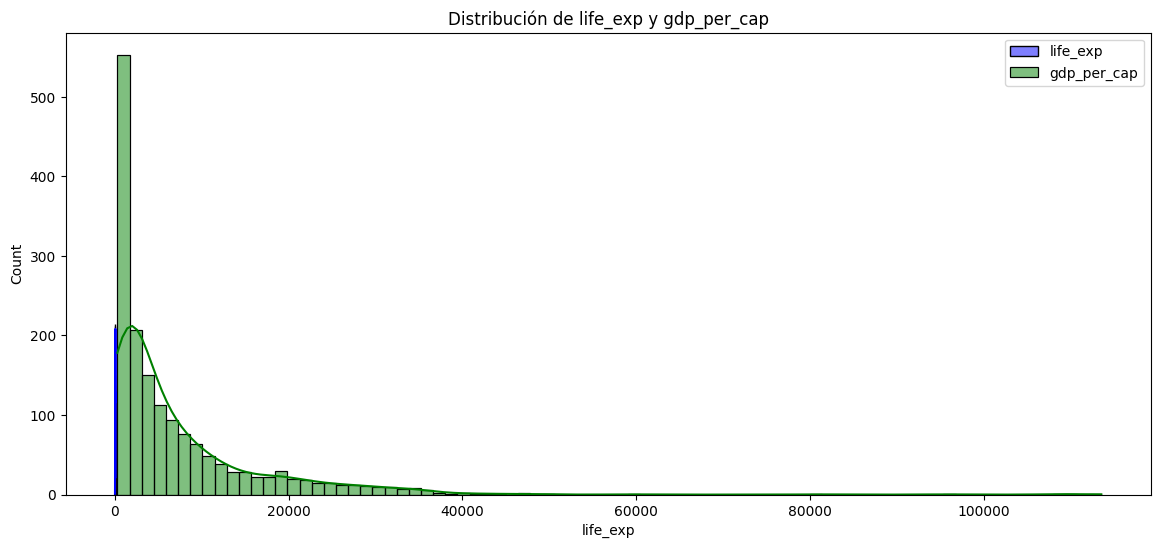

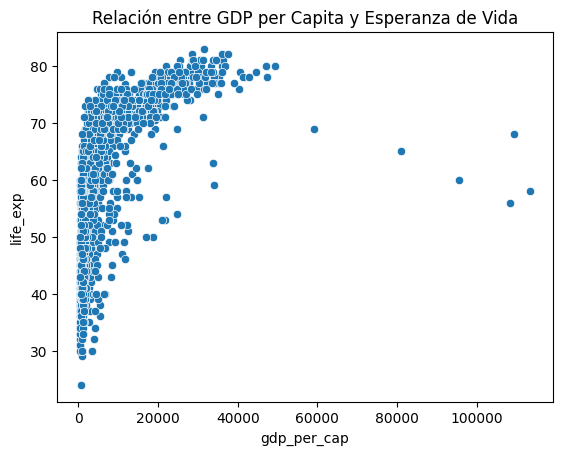

In [35]:
# Graficar la distribución de 'life_exp' y 'gdp_per_cap' para observar disparidades
plt.figure(figsize=(14, 6))
sns.histplot(df1['life_exp'], kde=True, color='blue', label='life_exp')
sns.histplot(df1['gdp_per_cap'], kde=True, color='green', label='gdp_per_cap')
plt.legend()
plt.title("Distribución de life_exp y gdp_per_cap")
plt.show()

# Graficar relación entre life_exp y gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=df1)
plt.title("Relación entre GDP per Capita y Esperanza de Vida")
plt.show()


## 3️⃣ **Escalado y Normalización**
### El siguiente paso es aplicar técnicas de escalado para reducir la disparidad entre las variables numéricas. Usaremos StandardScaler, MinMaxScaler y RobustScaler para comparar su impacto.


In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Crear objetos de escalado
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# Escalar las columnas
columns_to_scale = ['life_exp', 'gdp_per_cap', 'pop', 'Unnamed: 6']

df_scaled_standard = df1.copy()
df_scaled_standard[columns_to_scale] = scaler_standard.fit_transform(df1[columns_to_scale])

df_scaled_minmax = df1.copy()
df_scaled_minmax[columns_to_scale] = scaler_minmax.fit_transform(df1[columns_to_scale])

df_scaled_robust = df1.copy()
df_scaled_robust[columns_to_scale] = scaler_robust.fit_transform(df1[columns_to_scale])


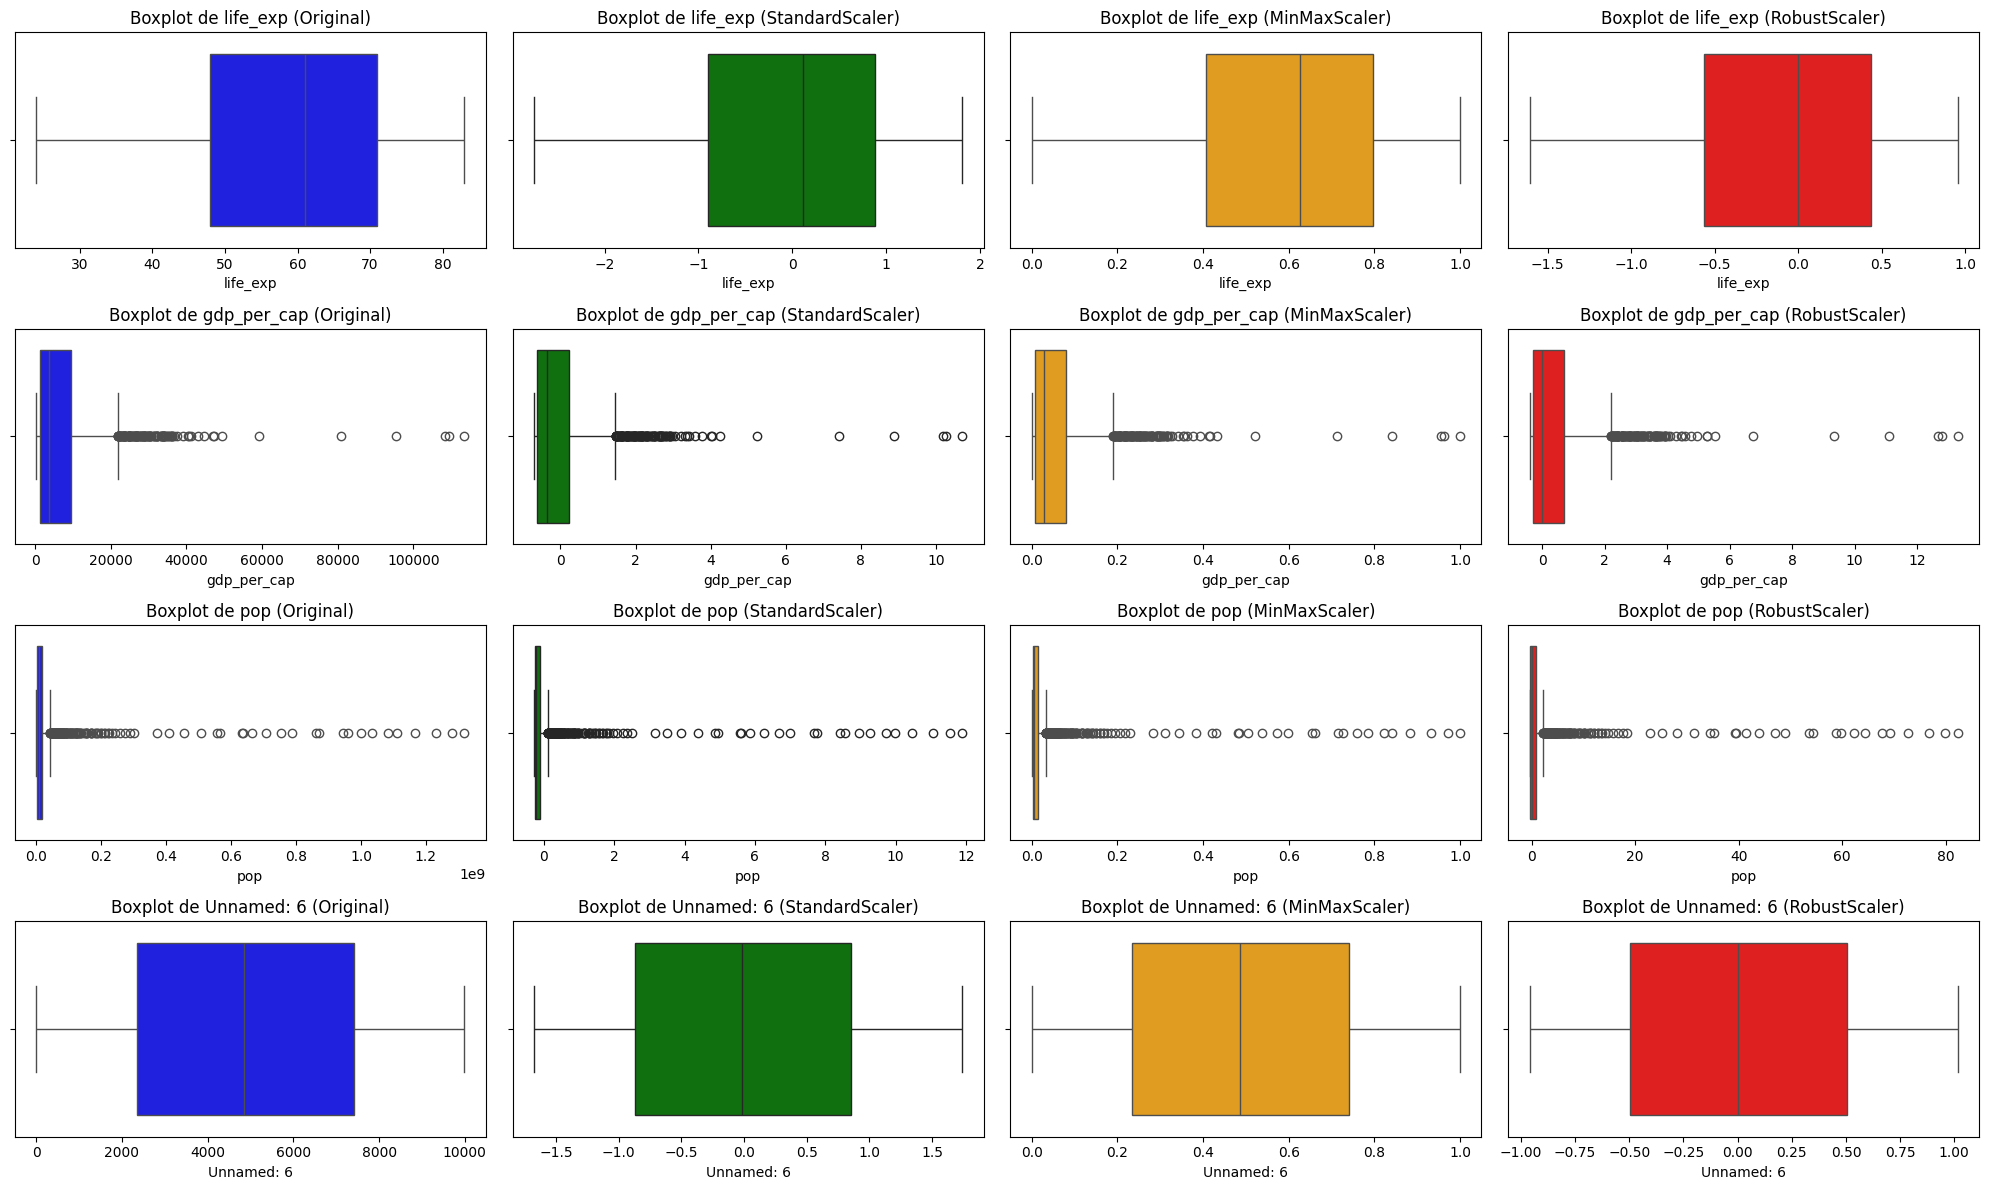

['life_exp', 'gdp_per_cap']


In [37]:
# Graficar boxplots para comparar las distribuciones antes y después del escalado
fig, axes = plt.subplots(4, 4, figsize=(20, 12))

# Boxplot de los datos originales
for i, col in enumerate(columns_to_scale):
    sns.boxplot(x=dfraw[col], ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f"Boxplot de {col} (Original)")

# Boxplot después de StandardScaler
for i, col in enumerate(columns_to_scale):
    sns.boxplot(x=df_scaled_standard[col], ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f"Boxplot de {col} (StandardScaler)")

# Boxplot después de MinMaxScaler
for i, col in enumerate(columns_to_scale):
    sns.boxplot(x=df_scaled_minmax[col], ax=axes[i, 2], color='orange')
    axes[i, 2].set_title(f"Boxplot de {col} (MinMaxScaler)")

# Boxplot después de RobustScaler
for i, col in enumerate(columns_to_scale):
    sns.boxplot(x=df_scaled_robust[col], ax=axes[i, 3], color='red')
    axes[i, 3].set_title(f"Boxplot de {col} (RobustScaler)")

plt.tight_layout()
plt.show()
print(columns_to_scale[0:2])

## 4️⃣ **Visualización de Dimensiones Principales**
Podemos usar el Análisis de Componentes Principales (PCA) para reducir las dimensiones de los datos escalados y visualizar las principales componentes en un espacio 2D o 3D.

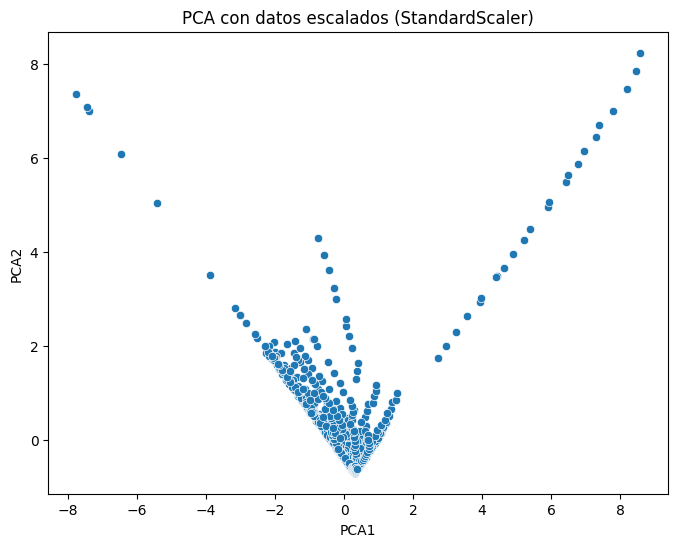

In [38]:
from sklearn.decomposition import PCA

# Crear PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados (StandardScaler)
pca_result = pca.fit_transform(df_scaled_standard[columns_to_scale[1:3]])

# Crear un DataFrame con los resultados
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title("PCA con datos escalados (StandardScaler)")
plt.show()



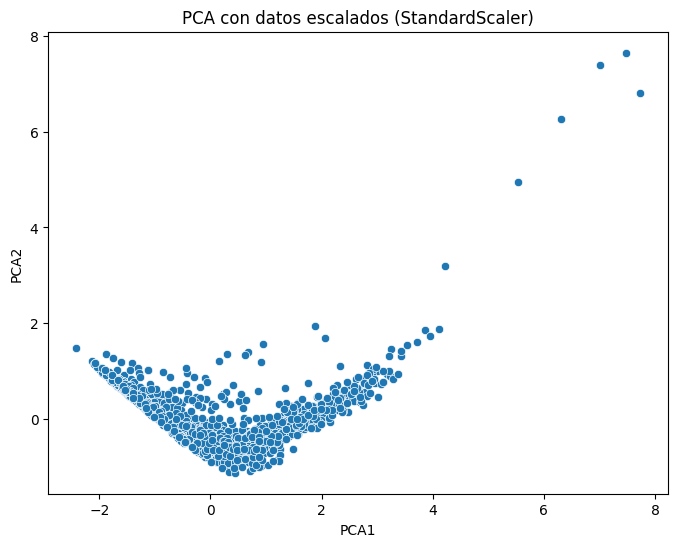

In [39]:
from sklearn.decomposition import PCA

# Crear PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados (StandardScaler)
pca_result = pca.fit_transform(df_scaled_standard[columns_to_scale[0:2]])

# Crear un DataFrame con los resultados
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title("PCA con datos escalados (StandardScaler)")
plt.show()

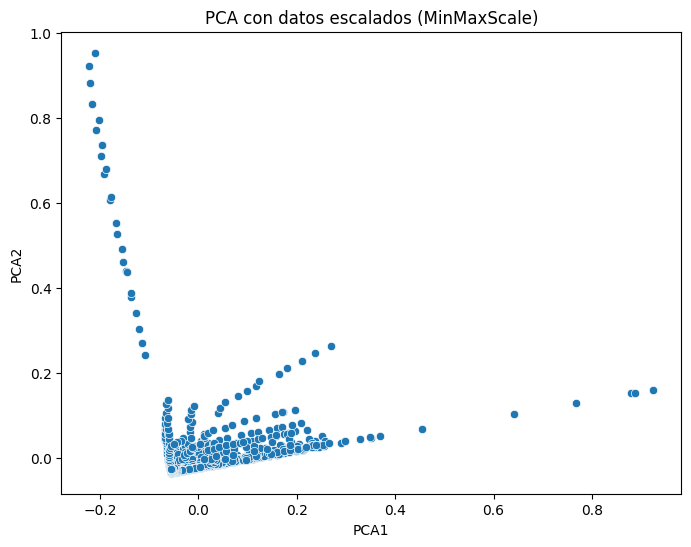

In [40]:
from sklearn.decomposition import PCA

# Crear PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados (MinMaxScale)
pca_result = pca.fit_transform(df_scaled_minmax[columns_to_scale[1:3]])

# Crear un DataFrame con los resultados
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title("PCA con datos escalados (MinMaxScale)")
plt.show()


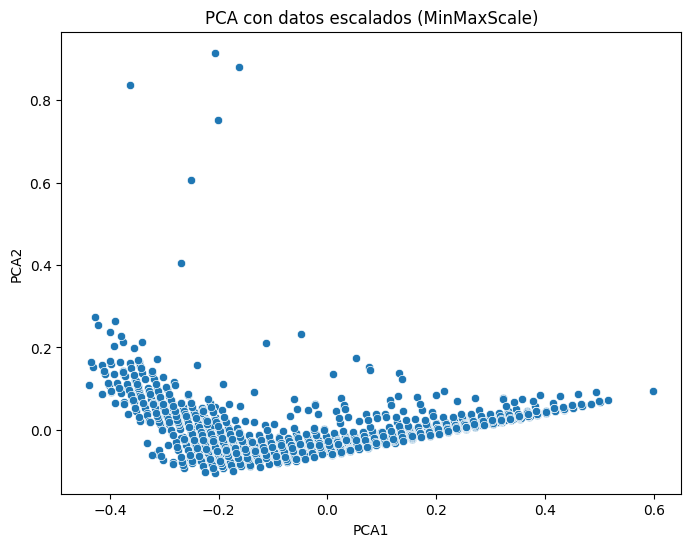

In [41]:
from sklearn.decomposition import PCA

# Crear PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados (MinMaxScale)
pca_result = pca.fit_transform(df_scaled_minmax[columns_to_scale[0:2]])

# Crear un DataFrame con los resultados
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title("PCA con datos escalados (MinMaxScale)")
plt.show()

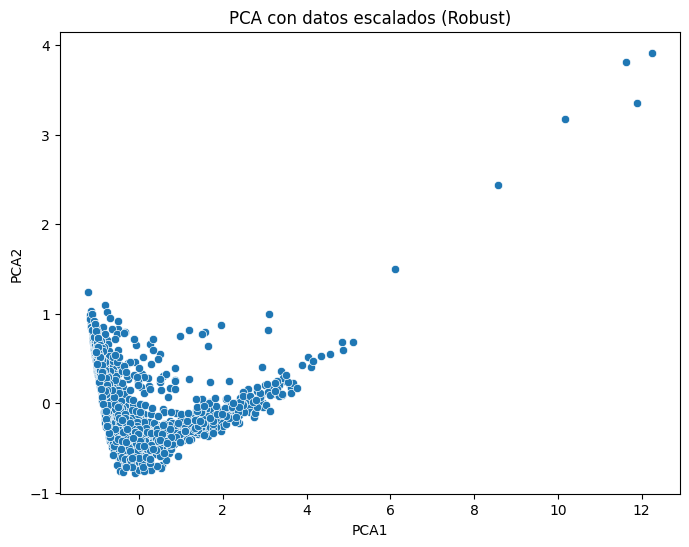

In [42]:
from sklearn.decomposition import PCA

# Crear PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados (Robust)
pca_result = pca.fit_transform(df_scaled_robust[columns_to_scale[0:2]])

# Crear un DataFrame con los resultados
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title("PCA con datos escalados (Robust)")
plt.show()

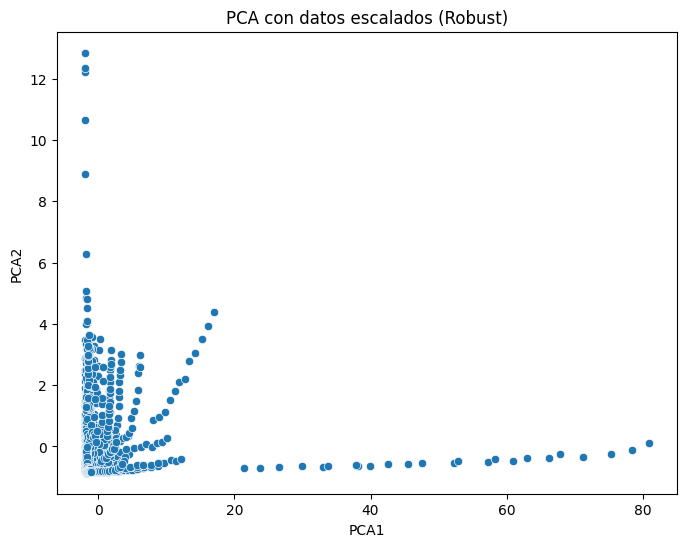

In [43]:
from sklearn.decomposition import PCA

# Crear PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados (Robust)
pca_result = pca.fit_transform(df_scaled_robust[columns_to_scale[1:3]])

# Crear un DataFrame con los resultados
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title("PCA con datos escalados (Robust)")
plt.show()

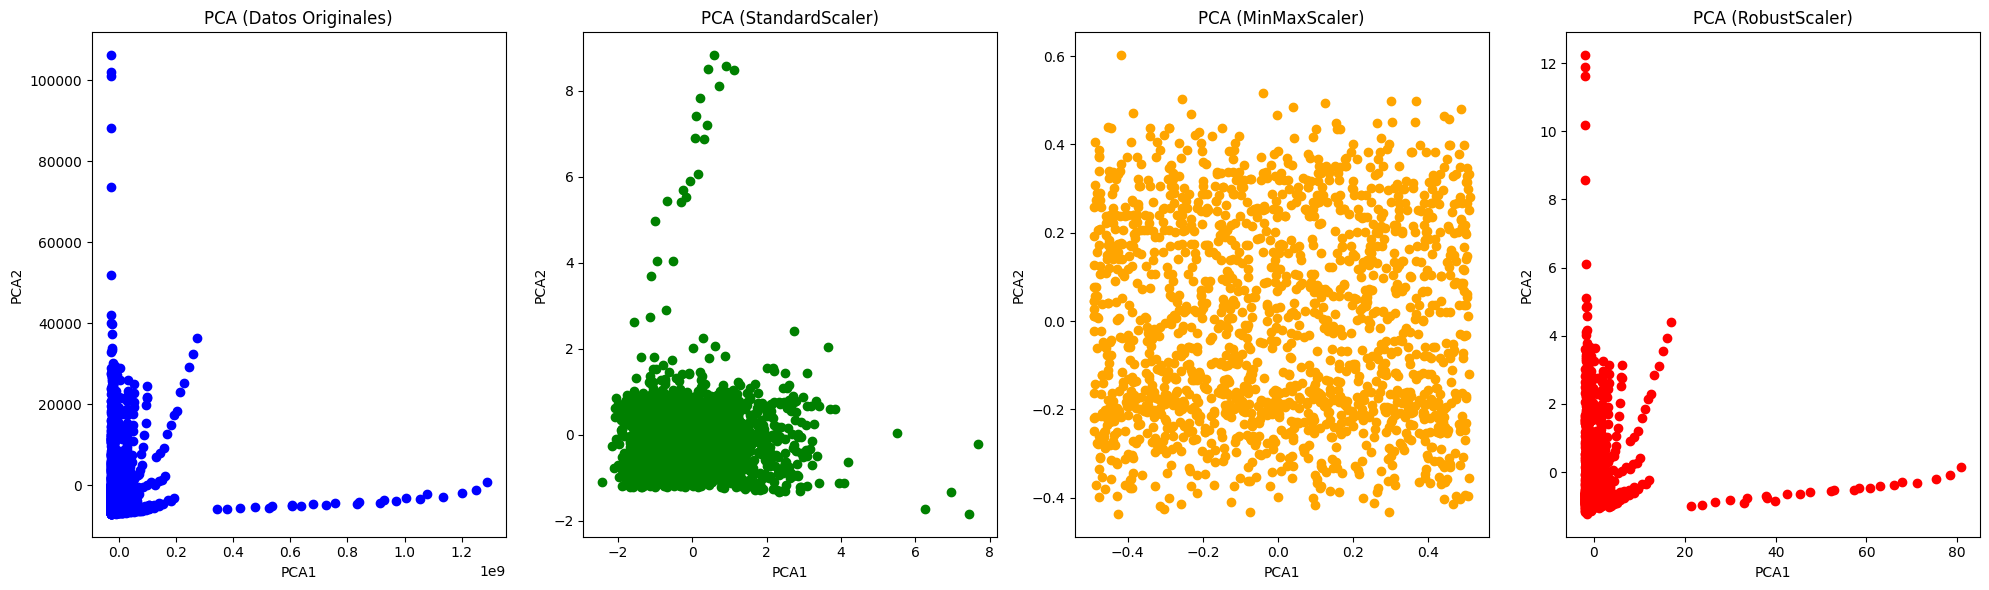

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Crear PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA a los datos originales (sin escalado)
pca_original = pca.fit_transform(df1[columns_to_scale])

# Aplicar PCA a los datos escalados (StandardScaler, MinMaxScaler, RobustScaler)
pca_standard = pca.fit_transform(df_scaled_standard[columns_to_scale])
pca_minmax = pca.fit_transform(df_scaled_minmax[columns_to_scale])
pca_robust = pca.fit_transform(df_scaled_robust[columns_to_scale])

# Crear DataFrame con los resultados de PCA
pca_original_df = pd.DataFrame(data=pca_original, columns=['PCA1', 'PCA2'])
pca_standard_df = pd.DataFrame(data=pca_standard, columns=['PCA1', 'PCA2'])
pca_minmax_df = pd.DataFrame(data=pca_minmax, columns=['PCA1', 'PCA2'])
pca_robust_df = pd.DataFrame(data=pca_robust, columns=['PCA1', 'PCA2'])

# Graficar los resultados de PCA
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# PCA Original
axes[0].scatter(pca_original_df['PCA1'], pca_original_df['PCA2'], color='blue')
axes[0].set_title("PCA (Datos Originales)")
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

# PCA StandardScaler
axes[1].scatter(pca_standard_df['PCA1'], pca_standard_df['PCA2'], color='green')
axes[1].set_title("PCA (StandardScaler)")
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

# PCA MinMaxScaler
axes[2].scatter(pca_minmax_df['PCA1'], pca_minmax_df['PCA2'], color='orange')
axes[2].set_title("PCA (MinMaxScaler)")
axes[2].set_xlabel('PCA1')
axes[2].set_ylabel('PCA2')

# PCA RobustScaler
axes[3].scatter(pca_robust_df['PCA1'], pca_robust_df['PCA2'], color='red')
axes[3].set_title("PCA (RobustScaler)")
axes[3].set_xlabel('PCA1')
axes[3].set_ylabel('PCA2')

plt.tight_layout()
plt.show()


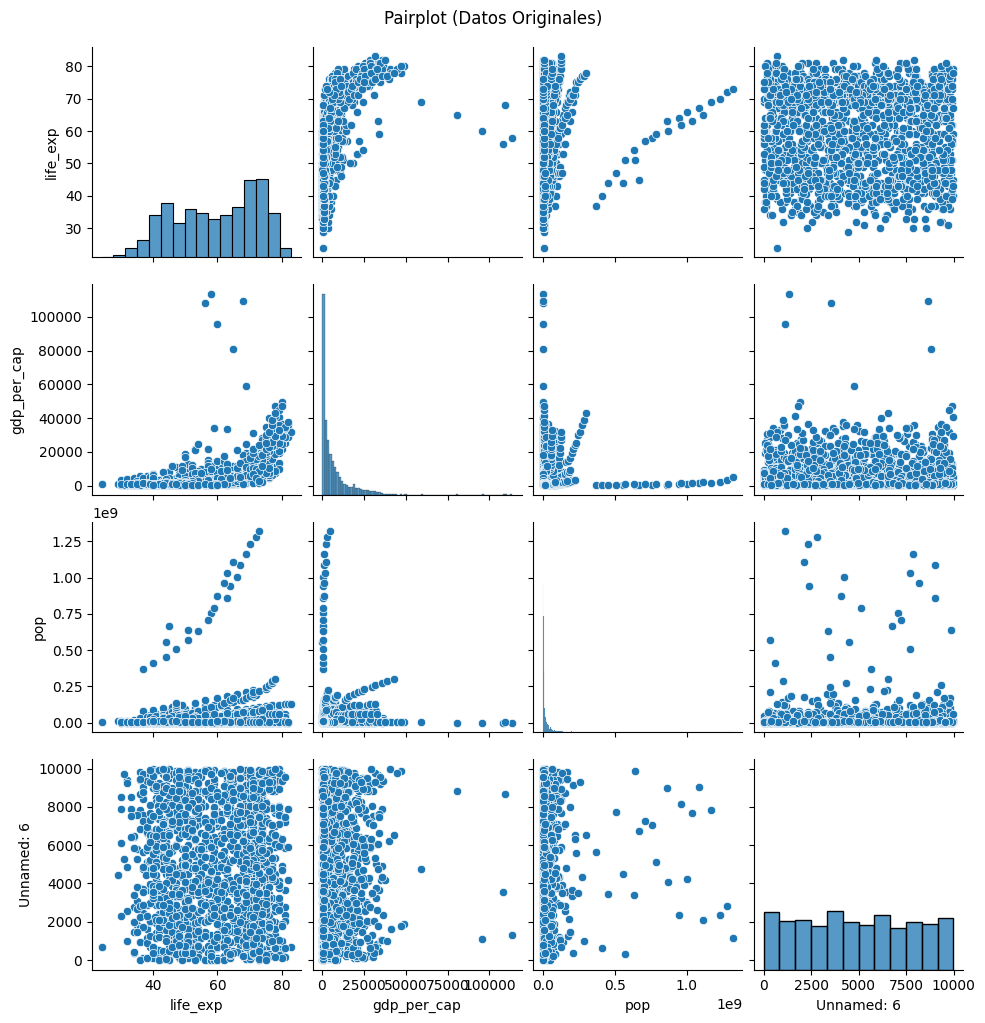

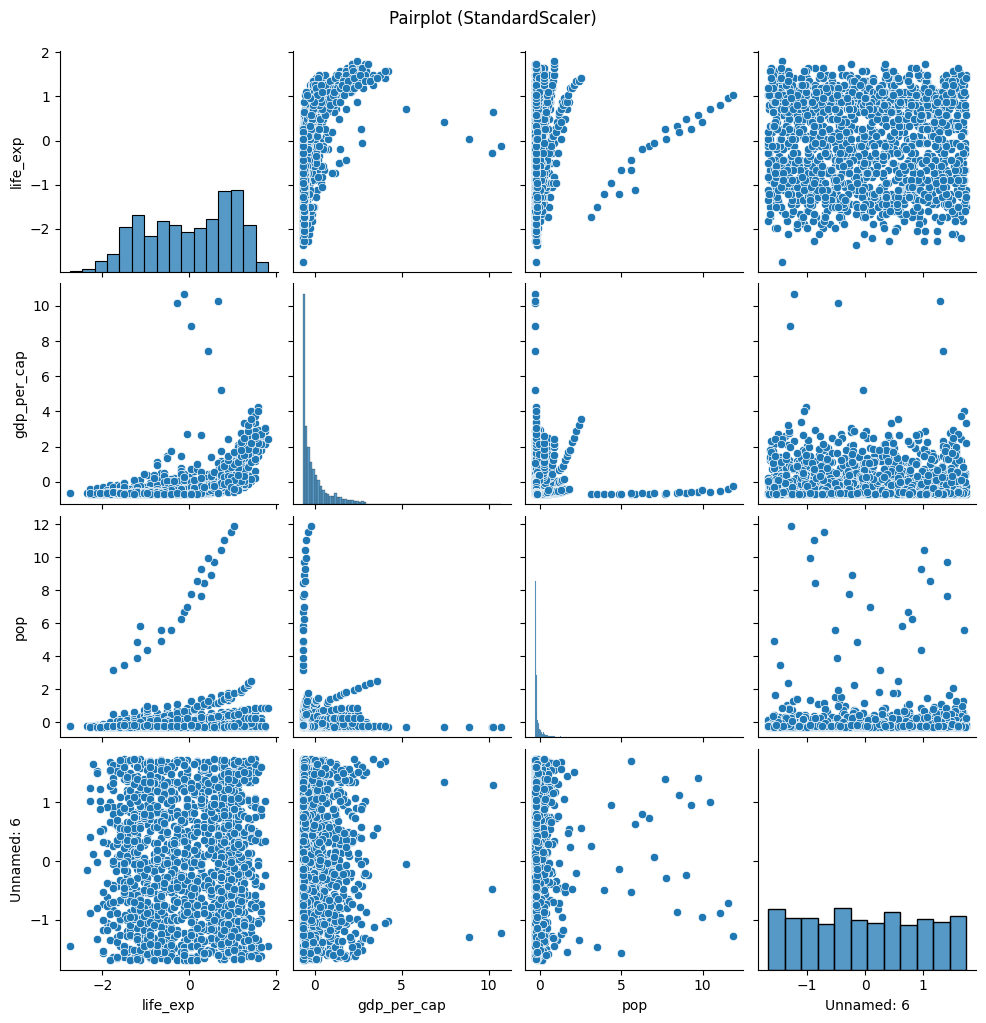

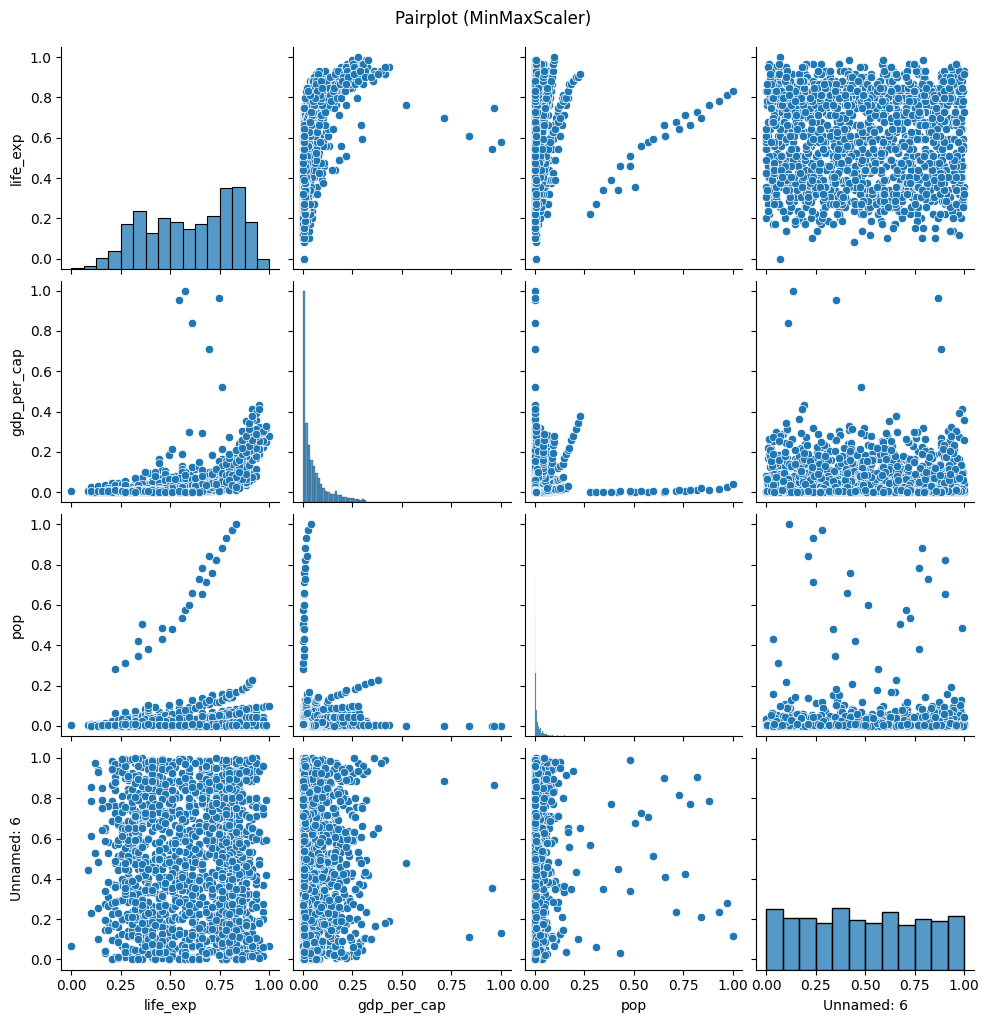

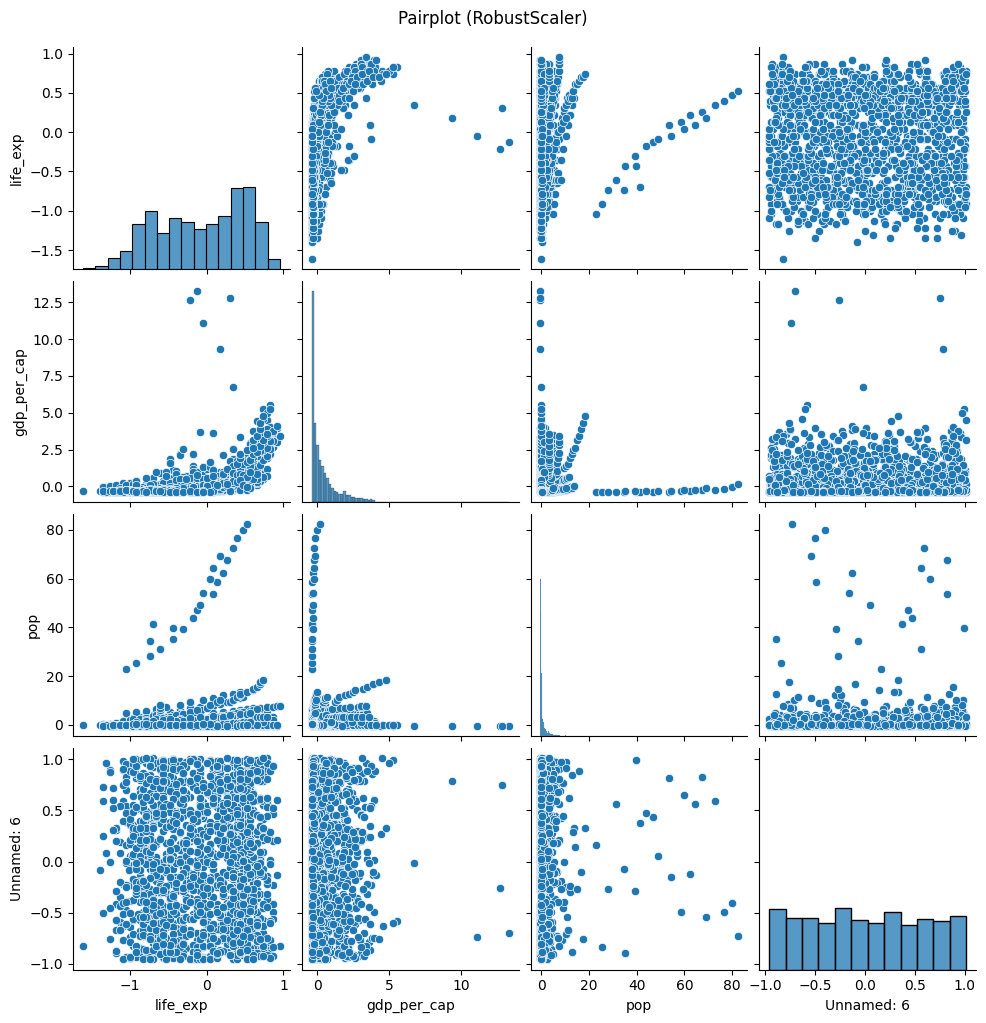

In [45]:
import seaborn as sns

# Crear DataFrame para el pairplot (incluyendo las transformaciones)
df_standard = pd.DataFrame(df_scaled_standard[columns_to_scale], columns=columns_to_scale)
df_minmax = pd.DataFrame(df_scaled_minmax[columns_to_scale], columns=columns_to_scale)
df_robust = pd.DataFrame(df_scaled_robust[columns_to_scale], columns=columns_to_scale)

# Pairplot antes del escalado (datos originales)
sns.pairplot(dfraw[columns_to_scale])
plt.suptitle("Pairplot (Datos Originales)", y=1.02)
plt.show()

# Pairplot después de StandardScaler
sns.pairplot(df_standard)
plt.suptitle("Pairplot (StandardScaler)", y=1.02)
plt.show()

# Pairplot después de MinMaxScaler
sns.pairplot(df_minmax)
plt.suptitle("Pairplot (MinMaxScaler)", y=1.02)
plt.show()

# Pairplot después de RobustScaler
sns.pairplot(df_robust)
plt.suptitle("Pairplot (RobustScaler)", y=1.02)
plt.show()


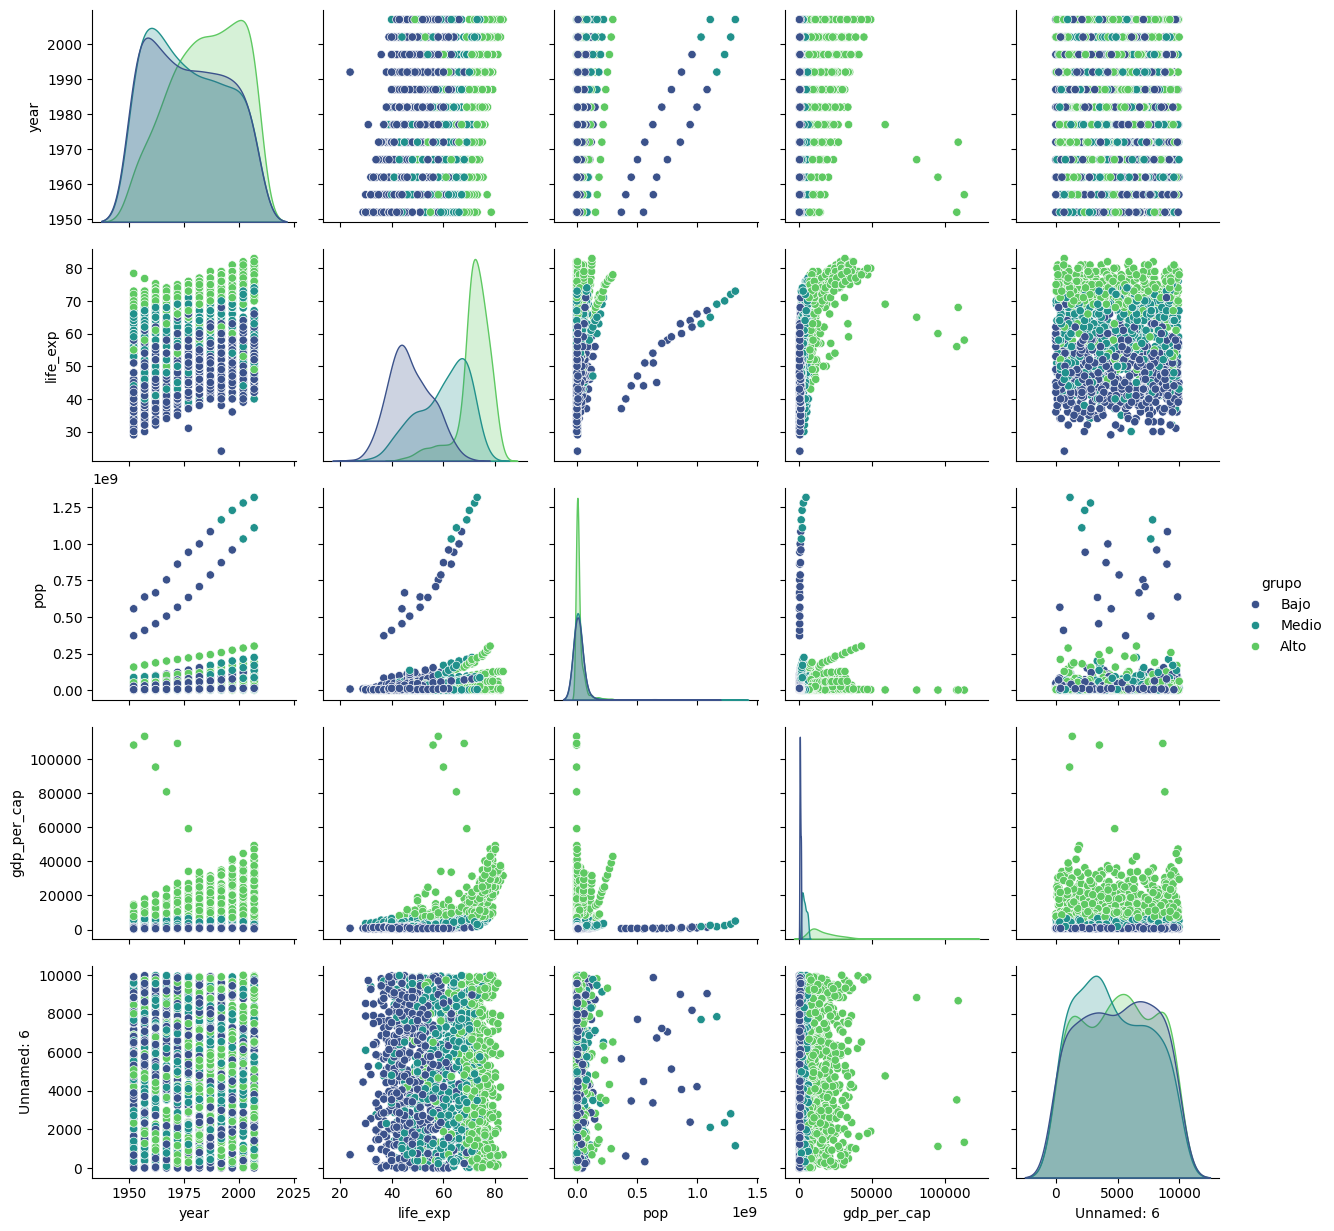

In [46]:
df1["grupo"] = pd.qcut(df_standard["gdp_per_cap"], q=3, labels=["Bajo", "Medio", "Alto"])
sns.pairplot(df1, hue="grupo", palette="viridis")
plt.show()

In [47]:
df1_cleaned[['life_exp', 'gdp_per_cap']].describe()



,life_exp,gdp_per_cap
count,1545.000000,1545.000000
mean,59.782524,7385.534628
std,12.947906,10041.882747
min,24.000000,298.000000
25%,48.000000,1213.000000
50%,61.000000,3682.000000
75%,71.000000,9576.000000
max,83.000000,113523.000000


In [48]:
df1[['life_exp', 'gdp_per_cap']].describe()

,life_exp,gdp_per_cap
count,1632.000000,1632.000000
mean,59.600490,7292.138787
std,12.945564,9930.481595
min,24.000000,298.000000
25%,48.000000,1201.750000
50%,61.000000,3622.000000
75%,71.000000,9468.250000
max,83.000000,113523.000000
